In [15]:
import sys
sys.path.append('..')

In [16]:
from pathlib import Path
import matplotlib.pyplot as plt
from Hamiltonians import IsingGrid

In [17]:
image_path = Path('./ThesisGraphics')
J = 1
L = 150
timestamps = 1000000
T_list = [1.5, 2.0, 2.27, 2.4, 3.0]
grids = []

In [18]:
current_grid = None
for i, T in enumerate(T_list):
    ising = IsingGrid(L, J)
    if i == 0:
        grid, spin, en = ising.metropolis(timestamps, T, negative=False)
        current_grid = grid
    else:
        ising.set_lattice(current_grid)
        grid, spin, en = ising.metropolis(timestamps, T, negative=False)
        current_grid = grid
    grids.append(current_grid)

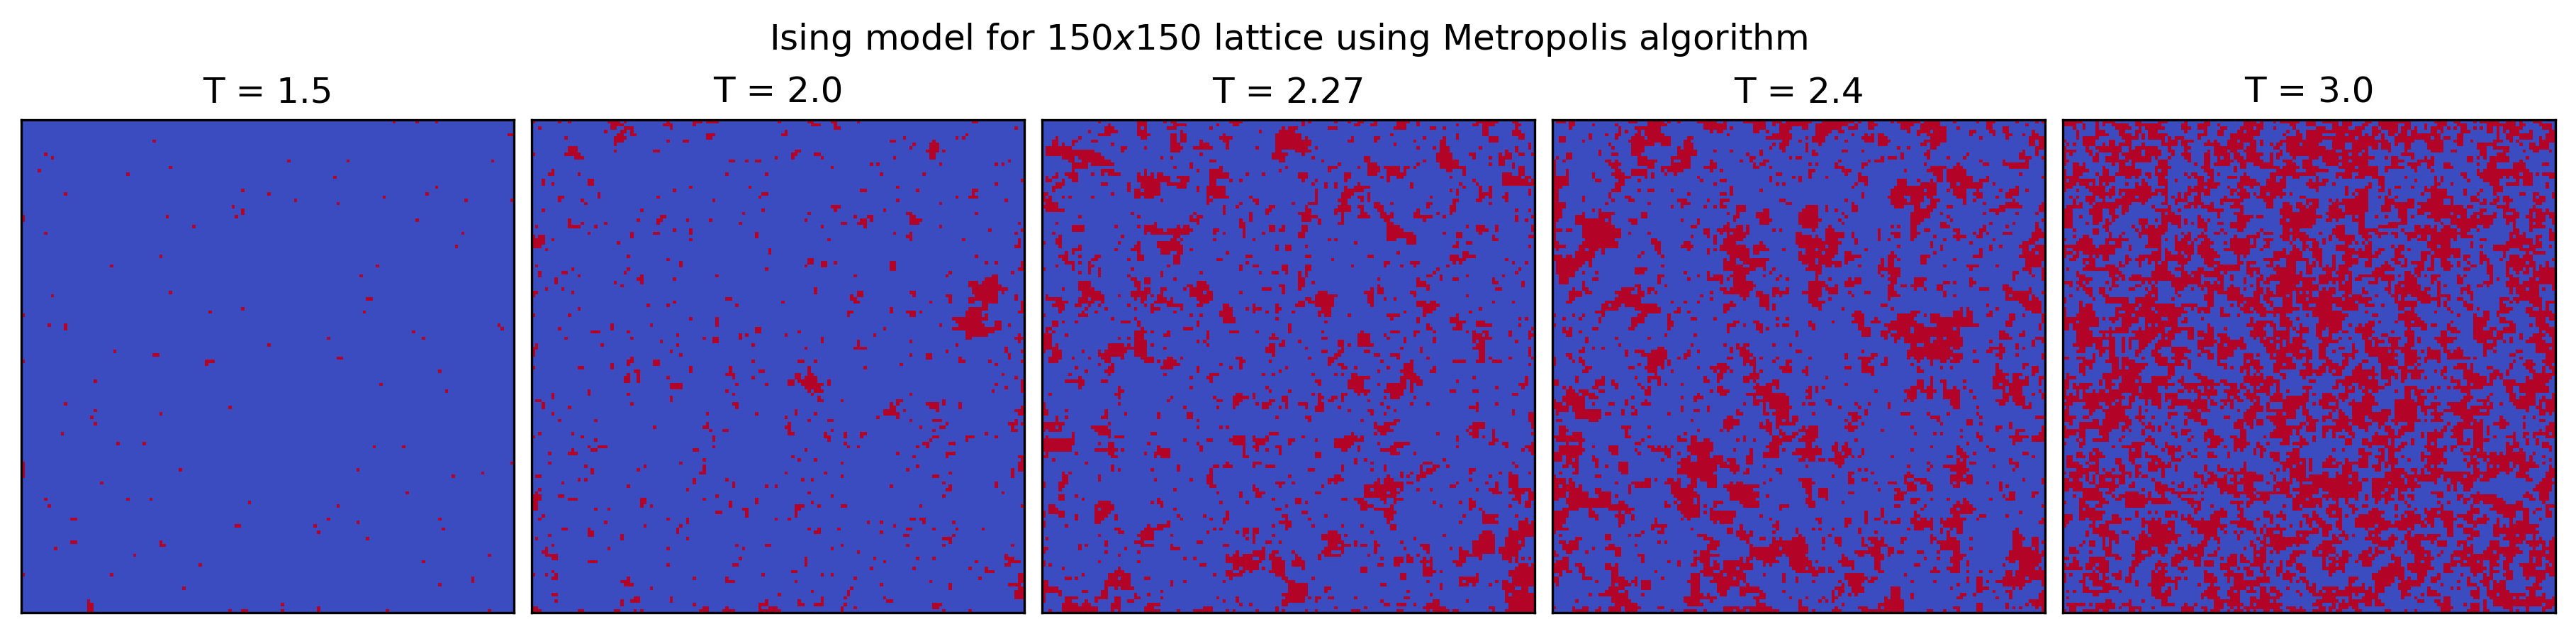

In [19]:
figure, axes = plt.subplots(1, 5, layout='constrained', figsize=(12, 3), dpi=300)
for T, grid, ax in zip(T_list, grids, figure.axes):
    ax.imshow(grid, cmap='coolwarm', interpolation='none')
    ax.set(xticks=[], yticks=[], title=f'T = {T}')
figure.suptitle(f'Ising model for ${L}x{L}$ lattice using Metropolis algorithm')
figure.savefig(image_path / f'IsingGridL{L}');